[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.8613

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



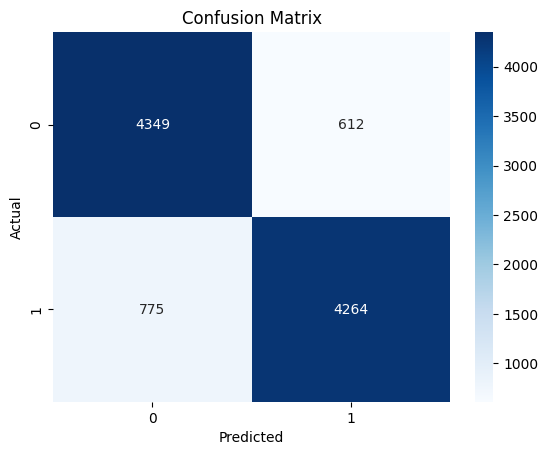

In [1]:
# ✅ STEP 1: Install & Import Required Libraries
!pip install nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')

# ✅ STEP 2: Load Dataset
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

# ✅ STEP 3: Data Preprocessing
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.replace(r'<.*?>', '', regex=True)
df['review'] = df['review'].str.replace('[^\w\s]', '', regex=True)
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# ✅ STEP 4: Train/Test Split
X = df['review']
y = df['sentiment']
y = y.map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 5: Text Vectorization
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# ✅ STEP 6: Train Sentiment Model
model = MultinomialNB()
model.fit(X_train_cv, y_train)

# ✅ STEP 7: Evaluate Model
y_pred = model.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ STEP 8: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
